# Linear regression single numeric feature

This notebook contains code to train and evaluate a linear regression model using a single numeric feature and label.

## Business Problem
Flight delays cost airlines money and frustrate passengers. We want to predict flight delays so we they can be potentially avoided or at least reduce the impact.

## Data set
The [US Department of Transportation](https://catalog.data.gov/dataset/) publishes a number of data sets including flight arrival and departure data


Import the required python libraries
- **pandas** contains the dataframe object and a number of useful methods for manipulating and querying data contained in a dataframe
- **numpy** contains a number of useful mathematical operations including some that are helpful when evaluating accuracy of trained models
- **Scikitlearn train_test_split** splits data into training and test sets
- **scikitlearn LinearRegression** used to train a linear regression model
- **scikitlearn metrics** used to calculate metrics such as Mean Squared Error, helpful when evaluating accuracy of trained models
- **matplotlib pyplot** used to plot graphs

In [37]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

Read flight data from csv file into Pandas dataframe

In [11]:
flight_df=pd.read_csv('all_flights.csv') # Read csv file into flight_df dataframe
flight_df.shape                          # Display shape of array to see how many rows and columns are in the dataframe

(616101, 17)

Display the first 10 rows in the dataset to make sure data looks like it imported correctly

In [12]:
flight_df.head()                         # Displays the top 10 rows from flight_df dataframe

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 16
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903.0,-2.0,1450,1433.0,-17.0,225.0,210.0,197.0,1670.0,NaN
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458.0,-2.0,2045,2020.0,-25.0,225.0,202.0,191.0,1670.0,NaN
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802.0,2.0,2045,2032.0,-13.0,105.0,90.0,80.0,580.0,NaN
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947.0,-3.0,1235,1223.0,-12.0,105.0,96.0,81.0,580.0,NaN
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151.0,1.0,1430,1423.0,-7.0,100.0,92.0,80.0,580.0,NaN


Display the names of the columns in the dataframe and their datatypes

In [13]:
flight_df.dtypes  # Displays the names and data types of the columns in the dataframe

FL_DATE                 object
OP_UNIQUE_CARRIER       object
TAIL_NUM                object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
Unnamed: 16            float64
dtype: object

Create a new dataframe containing ONLY the columns we want to use as features and labels.
This saves us spending time cleaning up data we are not using to train our model.
This model will use DISTANCE as a feature to predict the value of the label ARR_DELAY

In [14]:
min_flight_data_df = flight_df[['DISTANCE','ARR_DELAY']]  # Create a new dataframe containing only DISTANCE and ARR_DELAY
min_flight_data_df.shape                                  # Display the shape of the dataframe as a quick check to ensure 
                                                          # dataframe has expected number of columns and rows

(616101, 2)

Get rid of rows containing NaN/missing values

In [15]:
no_missing_values_df = min_flight_data_df.dropna(axis=0,how='any')  # Use dropna to remove rows with NaN in any column
no_missing_values_df.shape                                          # Display shape to see how many rows were removed

(610334, 2)

Create one dataframe containing only the features (DISTANCE), and one dataframe containing only the label (ARR_DELAY) 
If either of these has only one column you must reshape the dataframe to -1,1

In [16]:
# Create a dataFrame containign the features
# Reshape to -1,1 if only containing a single column
X = no_missing_values_df['DISTANCE'].values.reshape(-1,1)

In [17]:
# Create a DataFrame containing the labels
# Reshape to -1,1 if only containing a single column
y = no_missing_values_df['ARR_DELAY'].values.reshape(-1,1)

Split the data into two datasets, one for training the model, one for testing the model

scikitlearn method [train_test_split]( 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 
- **X** is the dataframe containing our features
- **Y** is the dataframe containing our label
- **test_size** determines what fraction of the data is put into the test dataframe
- **random_state** defaults to a random number, by specifying a specific number I ensure the split I generate is reproducible. That way if I make changes I know changes in accuracy are not caused by different rows used as training or test data.

In [21]:
#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

(427233, 1)

Check the size of your test and training datasets (i.e. how many rows in each)

In [ ]:
X_train.shape  # Display shape of training dataset

In [51]:
X_test.shape   # Display shape of testing dataset

(183101, 1)

Train the model using scikitlearn [LinearRegression]( 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Your feature must be numeric - there are many techniques you can use to convert non-numeric data into numeric data for training.

Your training data cannot contain any missing values in rows.

In [24]:
regressor = LinearRegression()     # Create a scikit learn LinearRegression object
regressor.fit(X_train, y_train)    # Use the fit methong to train the model using your training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's see what arrival delays are predicted for our test data by using the **predict** method of our linearRegression object

In [27]:
y_pred = regressor.predict(X_test)  # Create predictions for all our test data

Let's compare the actual arrival delay times and the predicted arrival delay times

In [1]:
results_df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
results_df.head()

NameError: name 'pd' is not defined

We can do some calculations to get a sense of overall accuracy

In [32]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error:  20.25653001742976


In [33]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 1774.0880095844536


In [36]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 42.11992414029795


What is the slope and intercept of the linear regression graph (think back to high school physics y = ax+b what is a and what is b)
the interceptor is the intercept (b)
the coef is the slope (a)

In [92]:
print(regressor.intercept_)

[3.62692537]


In [93]:
print(regressor.coef_) #Slope

[[-0.00101446]]


Lets show a graph with the predicted linear regression and our test data all in one graph to visualize what is being predicted (in red) vs actual values (in grey)

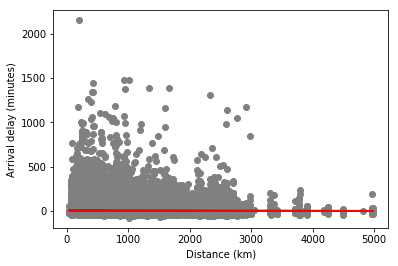

In [41]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred, color='red',linewidth=2)
plt.xlabel('Distance (km)')
plt.ylabel('Arrival delay (minutes)')
plt.show()

Hmmmm those results don't look very good, maybe we should see if there is a correlation between the distance and arrival delay, i.e. does arrival delay tend to increase or decrease as distance of flight changes?

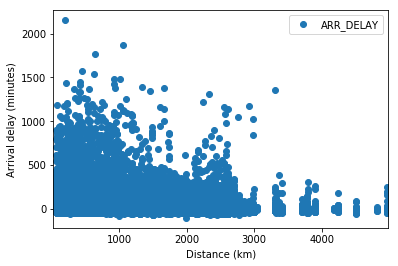

In [42]:
min_flight_data_df.plot(x='DISTANCE',y='ARR_DELAY',style='o')
plt.xlabel('Distance (km)')
plt.ylabel('Arrival delay (minutes)')
plt.show()

Well that accounts for our lousy results, there is not a clear increase or decrease in the arrival delay as distance increases or decreases!  There are short flights with big delays and long flights with small delays and vice-versa

Maybe we should try training a model using a different feature! Let's check if there is a correlation between departure delay and arrival delay


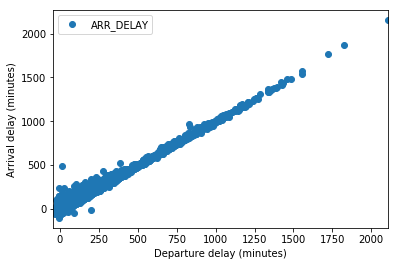

In [44]:
flight_df.plot(x='DEP_DELAY',y='ARR_DELAY',style='o')
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.show()

Now THERE's a correlation, you can clearly see higher departure delays results in higher arrival delays. Let's see what results we get if we train a model to predict arrival delay based on the departure delay.

In [45]:
min_flight_data_df = flight_df[['DEP_DELAY','ARR_DELAY']]  # Create dataframe with only features and labels
no_missing_values_df = min_flight_data_df.dropna(axis=0,how='any') # Remove rows with missing values
X = no_missing_values_df['DEP_DELAY'].values.reshape(-1,1) # Create dataframe containing feature DEP_DELAY
y = no_missing_values_df['ARR_DELAY'].values.reshape(-1,1) # Create dataframe containing label ARR_DELAY
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42) # split into test and training data
regressor = LinearRegression()                             # Create linear Regression object
regressor.fit(X_train, y_train)                            # Train model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Run your test data through the model to predict arrival delays and compare values for actual and prediced arrival delay

In [46]:
y_pred = regressor.predict(X_test)  # Create predictions for all our test data
results_df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
results_df.head()

,Actual,Predicted
0,-13.0,-10.174140
1,-24.0,-9.168756
2,100.0,65.229722
3,-8.0,-11.179525
4,-19.0,-11.179525


let's measure the accuracy of our model

In [47]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error:  9.033505526602951


In [48]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 163.26825261343365


In [50]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 12.777646599175986


Let's visualize the predicted vs actual values - predicted values in red, actual values in gray

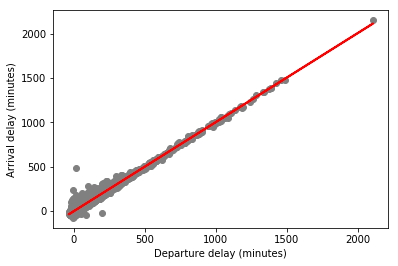

In [51]:
plt.scatter(X_test,y_test,color='gray')
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.plot(X_test,y_pred, color='red',linewidth=2)
plt.show()

## Conclusion
If we know the departure delay we can predict with some confidence the arrival delay.

This particular model is not likely to revolutionize air travel. I think we could have guessed that if a flight leaves 30 minutes late it's likely to arrive around 30 minutes late, and a flight that leaves 500 minutes late will arrive around 500 mintues late which is approximately what this model predicts.